In [36]:
%matplotlib inline

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [38]:
super = pd.read_csv("Super C19.csv")
super = super.drop('Unnamed: 0', axis = 1)

#Creating cases and deaths columns to later get accruate new cases and deaths
for i in range(3142):
    column_data = 0

super.insert(4, "2020-01-21,1cases", column_data)
super.insert(1096, "2020-01-21,2deaths", column_data)

super

,countyFIPS,County Name,State,StateFIPS,"2020-01-21,1cases","2020-01-22,1cases","2020-01-23,1cases","2020-01-24,1cases","2020-01-25,1cases","2020-01-26,1cases",...,"2023-01-28,2deaths","2023-01-29,2deaths","2023-01-30,2deaths","2023-01-31,2deaths","2023-02-01,2deaths","2023-02-02,2deaths","2023-02-03,2deaths","2023-02-04,2deaths","2023-02-05,2deaths",population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,723,723,723,723,723,723,723,723,723,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,109,109,109,109,109,109,109,109,109,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,137,137,137,137,137,137,137,137,137,42343
3138,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
3139,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
3140,56043,Washakie County,WY,56,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,7805


In [39]:
USData = super.drop(super.columns[[0, 1, 2, 3, -1]], axis=1).sum()
USData

2020-01-21,1cases           0
2020-01-22,1cases         723
2020-01-23,1cases         734
2020-01-24,1cases         741
2020-01-25,1cases         751
                       ...   
2023-02-01,2deaths    1002173
2023-02-02,2deaths    1002786
2023-02-03,2deaths    1002861
2023-02-04,2deaths    1002861
2023-02-05,2deaths    1002861
Length: 2204, dtype: int64

In [40]:
US_Cases = []
US_Deaths = []
for i in range(len(USData.keys())):
    if str(USData.keys()[i][11:13]) != "2d":
        US_Cases.append(USData[i])
    else:
        US_Deaths.append(USData[i])

# print(US_Cases)
# print(US_Deaths)

#Getting the new cases and deaths
NewUS_Cases = []
for i in reversed(range(len(US_Cases))):
    UNC = US_Cases[i] - US_Cases[i - 1]
    if (UNC < 0):
        UNC = 0
    NewUS_Cases.insert(0, UNC)

NewUS_Deaths = []
for i in reversed(range(len(US_Deaths))):
    UND = US_Deaths[i] - US_Deaths[i - 1]
    if (UND < 0):
        UND = 0
    NewUS_Deaths.insert(0, UND)

NewUS_Cases.pop(0)
print(NewUS_Cases)
NewUS_Deaths.pop(0)
print(NewUS_Deaths)

[723, 11, 7, 10, 8, 10, 6, 4, 7, 16, 28, 0, 7, 4, 2, 4, 6, 33, 7, 7, 9, 4, 4, 3, 10, 12, 7, 15, 10, 11, 24, 20, 15, 19, 39, 25, 42, 25, 62, 46, 114, 91, 106, 146, 145, 257, 261, 378, 574, 545, 778, 881, 1193, 993, 1397, 2470, 3417, 5390, 5403, 7991, 7578, 9913, 11053, 14575, 16527, 16695, 19847, 18095, 20807, 23672, 24607, 28422, 35497, 33510, 25542, 29880, 31654, 32954, 33930, 33521, 49942, 8041, 24611, 26342, 30067, 33389, 31073, 28345, 25767, 25468, 25509, 28299, 31446, 37213, 34325, 25488, 22770, 25638, 27878, 29898, 33212, 30230, 24257, 21721, 23568, 24834, 27779, 26952, 25161, 19590, 19030, 22481, 21866, 26863, 25408, 24483, 18119, 20721, 21647, 23161, 25852, 23434, 22275, 20099, 18414, 17445, 20089, 23794, 25679, 22460, 19130, 20727, 20661, 21514, 21964, 28203, 23803, 18246, 17362, 19404, 22034, 23305, 25913, 26326, 20819, 19094, 28610, 26920, 30280, 34612, 33621, 28771, 28147, 38263, 40694, 43509, 49769, 46810, 40247, 35877, 50435, 53385, 56808, 61164, 51418, 42317, 44428, 5662

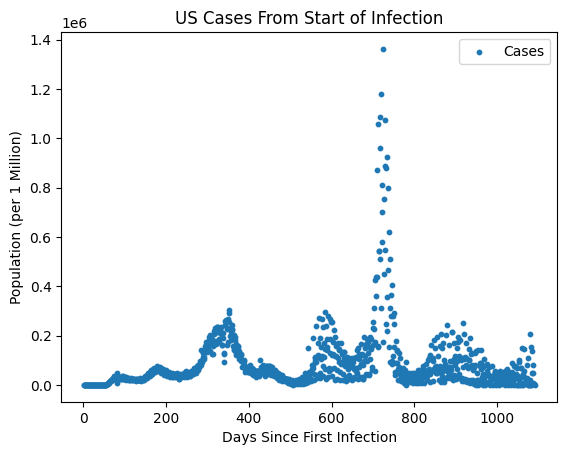

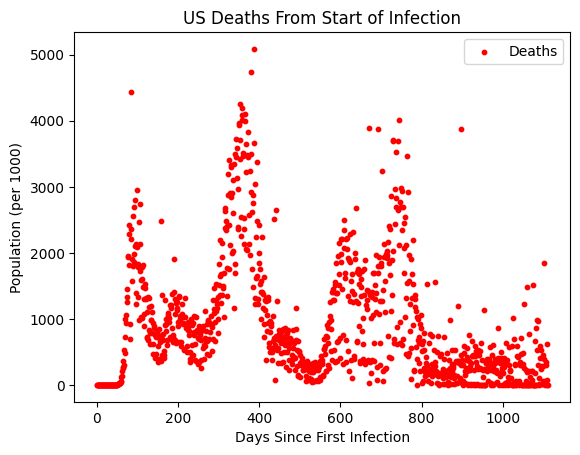

In [41]:
case_data = []
for i in range(len(NewUS_Cases)):
    i += 1
    day_data = i
    case_data.append(day_data)

death_data = []
for i in range(len(NewUS_Deaths)):
    i += 1
    day_data = i
    death_data.append(day_data)

NewUS_Cases = np.array(NewUS_Cases)
NewUS_Deaths = np.array(NewUS_Deaths)
case_data = np.array(case_data)
death_data = np.array(death_data)

plt.scatter(case_data, NewUS_Cases, label='Cases', s = 10)
plt.legend()
plt.title("US Cases From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1 Million)")
plt.show()

plt.scatter(death_data, NewUS_Deaths, label='Deaths', c ="red", s = 10)
plt.legend()
plt.title("US Deaths From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1000)")
plt.show()

Linear Regression Models

Text(0.5, 1.0, 'U.S. Cases Mean Squared Error: 1.64e+10')

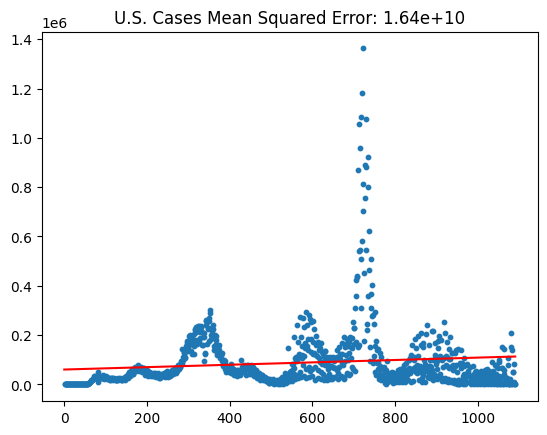

In [42]:
xCases = case_data.reshape((-1, 1))
yCases = NewUS_Cases

model = LinearRegression().fit(xCases, yCases)
y_pred = model.predict(xCases)
x_test = np.linspace(0, 1091, 1091)[:, None]

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test.ravel(), y_pred, c ="red")
plt.title("U.S. Cases Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(xCases), yCases)))

Text(0.5, 1.0, 'U.S. Deaths Mean Squared Error: 7.99e+05')

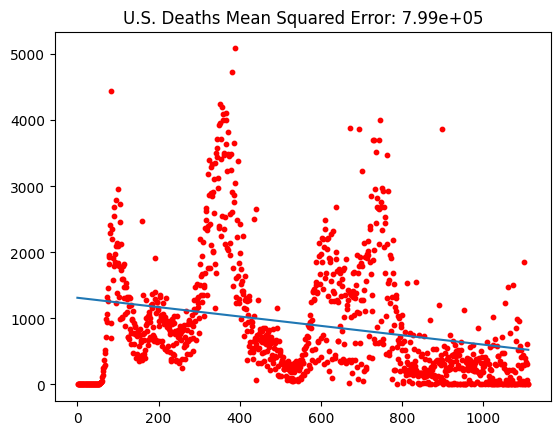

In [43]:
xDeaths = death_data.reshape((-1, 1))
yDeaths = NewUS_Deaths

model = LinearRegression().fit(xDeaths, yDeaths)
y_pred = model.predict(xDeaths)
x_test = np.linspace(0, 1111, 1111)[:, None]

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test.ravel(), y_pred)
plt.title("U.S. Deaths Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(xDeaths), yDeaths)))

Non-Linear (Polynomial) Regression Models